In [20]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (96, 96, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [29]:
model = Sequential()

model.add(layers.UpSampling2D(size=(3,3), interpolation='bilinear'))

model.add(base_model)

model.add(layers.GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d_4 (UpSampling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 1, 1, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [31]:
batch_size = 64
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 144ms/step - accuracy: 0.4850 - loss: 1.5487 - val_accuracy: 0.6539 - val_loss: 1.0090
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.6254 - loss: 1.0915 - val_accuracy: 0.6604 - val_loss: 0.9771
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - accuracy: 0.6542 - loss: 1.0012 - val_accuracy: 0.6765 - val_loss: 0.9528
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.6660 - loss: 0.9637 - val_accuracy: 0.6733 - val_loss: 0.9485
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 141ms/step - accuracy: 0.6788 - loss: 0.9324 - val_accuracy: 0.6808 - val_loss: 0.9354


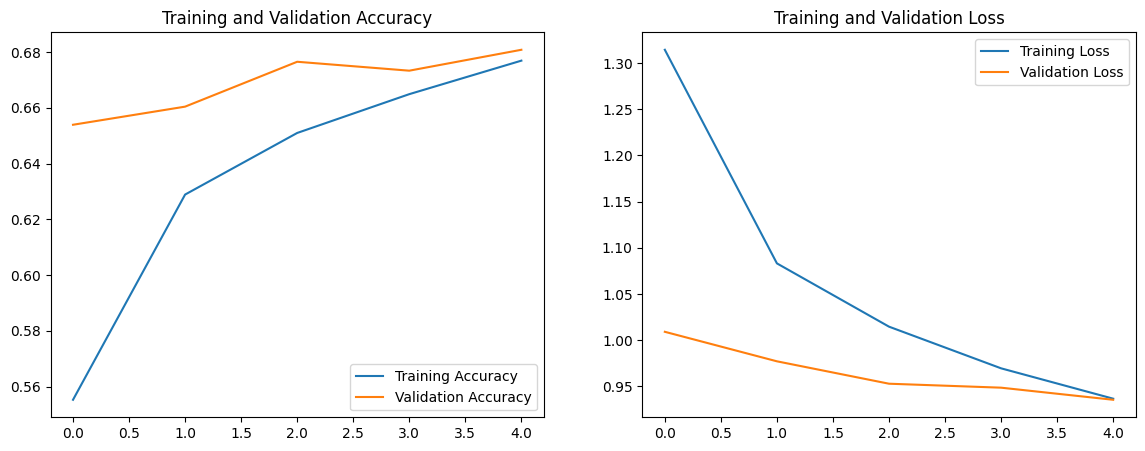

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()